In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import torch 
import torch.nn.functional as F 


In [2]:
names = open("names.txt").read().split("\n")
stoi = { ch: i+1 for i, ch in enumerate("abcdefghijklmnopqrstuvwxyz") }
stoi["."] = 0
itos = {v: k  for k, v in stoi.items()}
freq = [ [0] * len(stoi) for _ in range(len(stoi)) ]
for name in names:
    name = "." + name + "."
    for ch1, ch2 in zip(name, name[1:]):
        freq[stoi[ch1]][stoi[ch2]] += 1
N = torch.tensor(freq)
P = N.float()
P = P / P.sum(dim=1, keepdim=True)

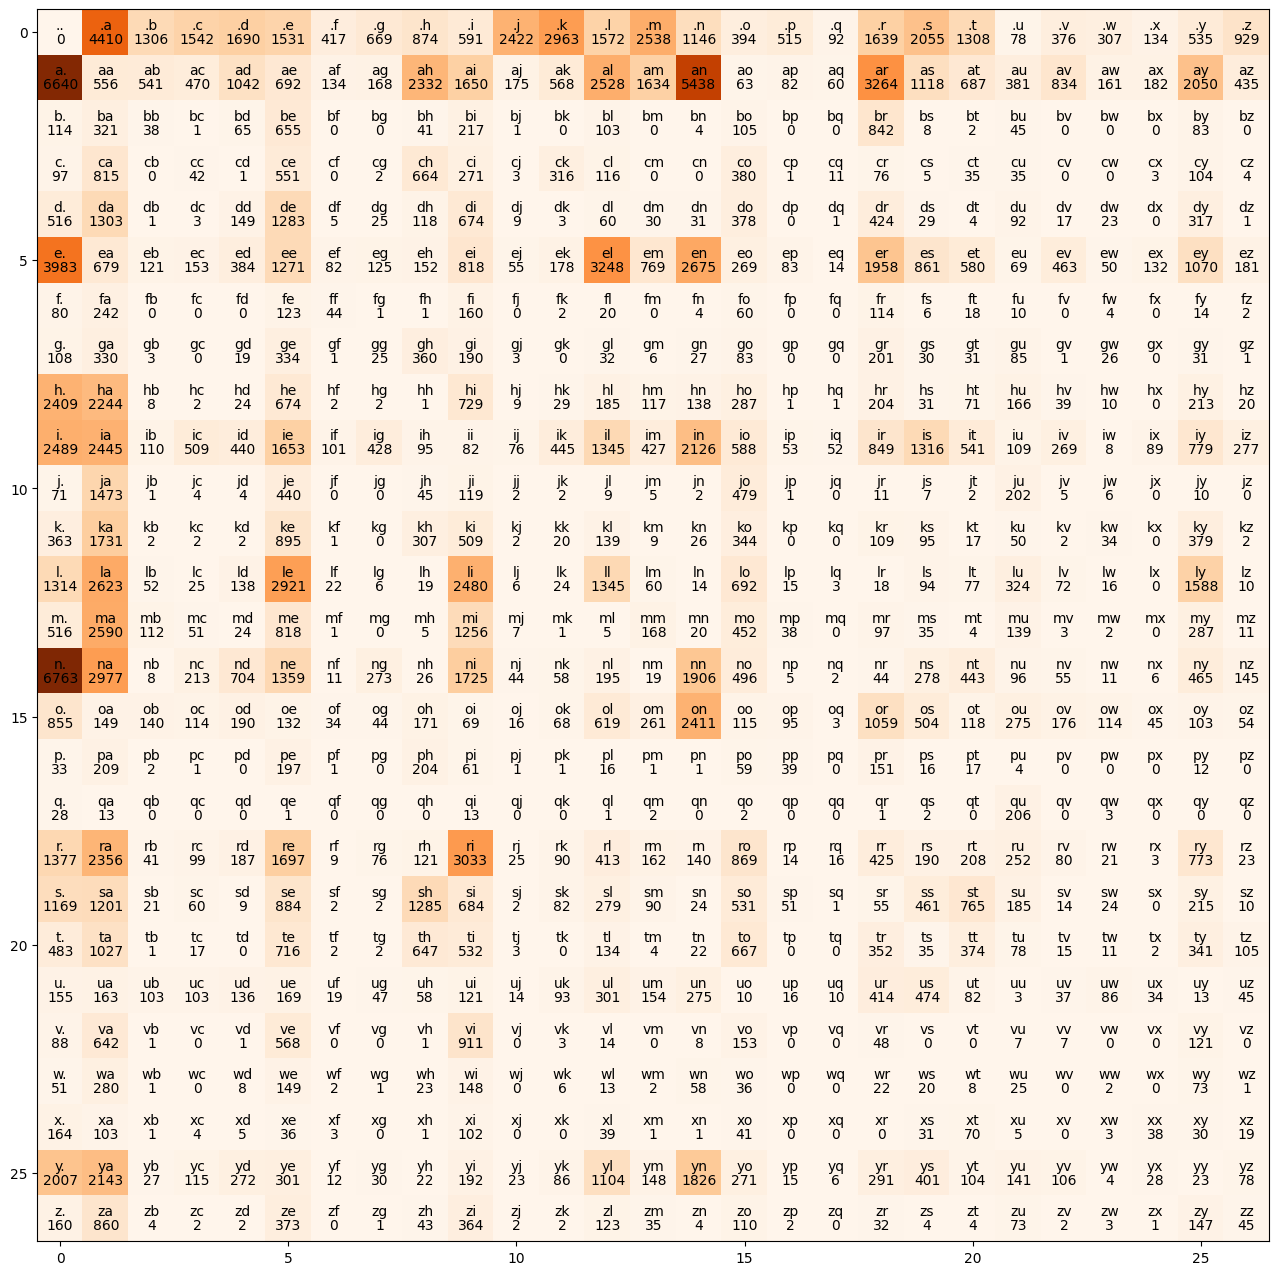

In [3]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Oranges")
for i in range(len(stoi)):
    for j in range(len(stoi)):
        label = itos[i] + itos[j]
        plt.text(j, i, label, va="bottom", ha="center")
        plt.text(j, i, f"{N[i, j].item()}", va="top", ha="center")

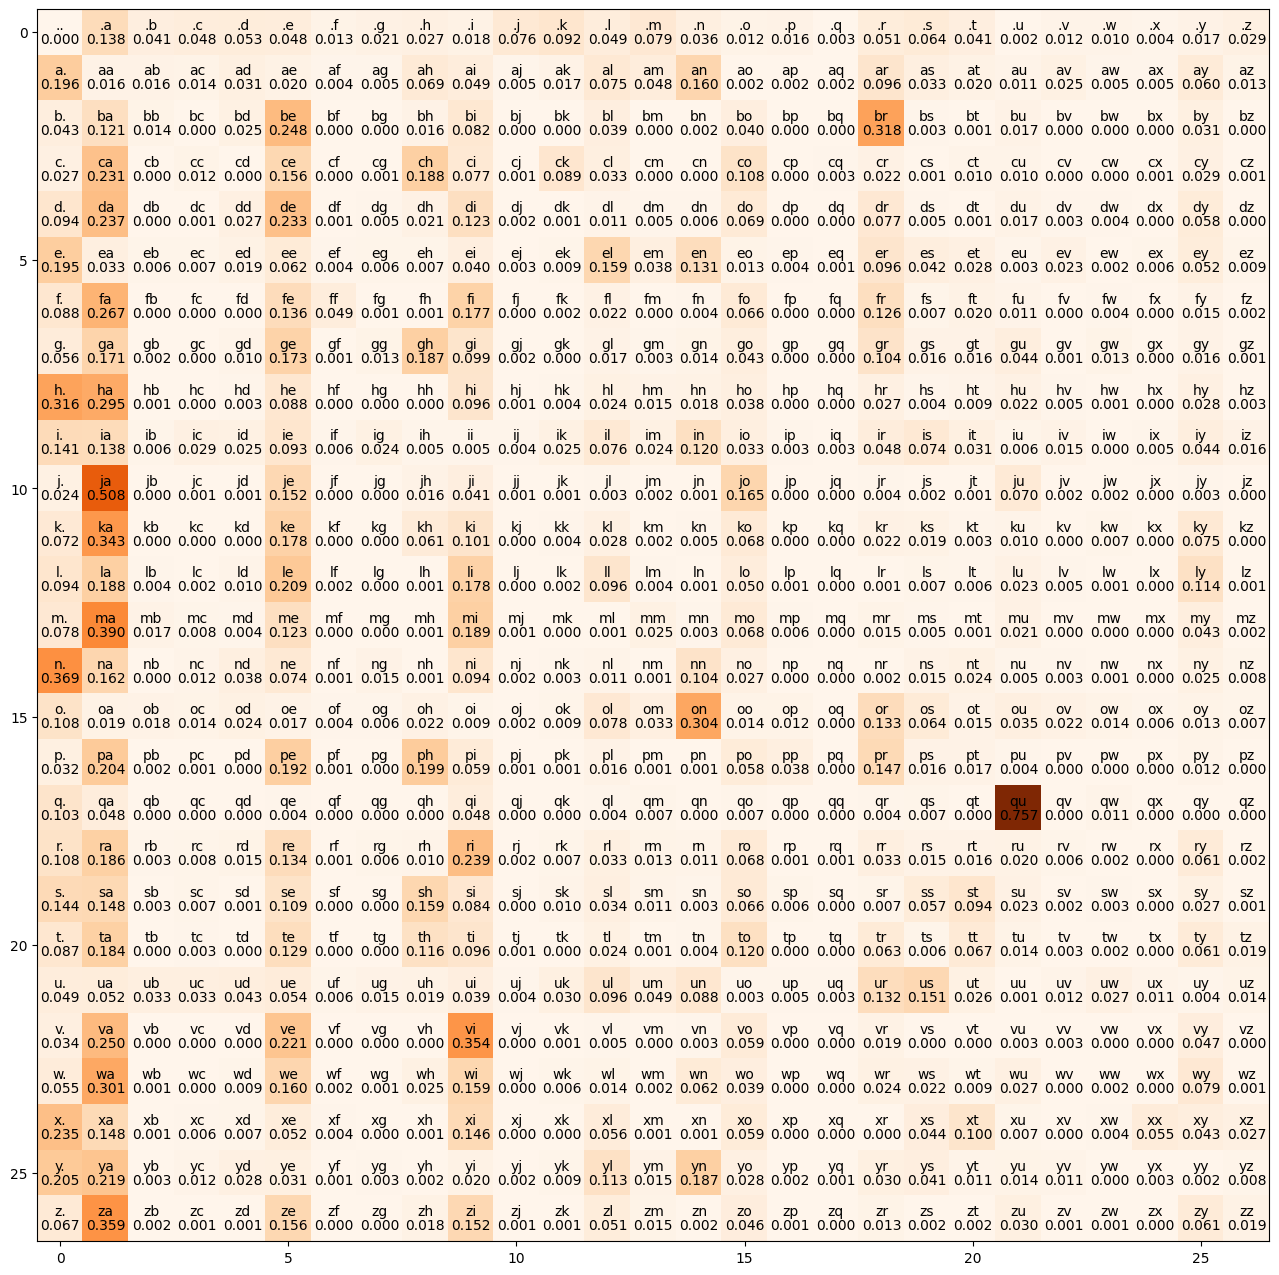

In [60]:
plt.figure(figsize=(16, 16))
plt.imshow(P, cmap="Oranges")
for i in range(len(stoi)):
    for j in range(len(stoi)):
        label = itos[i] + itos[j]
        plt.text(j, i, label, va="bottom", ha="center")
        plt.text(j, i, f"{P[i, j].item():.3f}", va="top", ha="center")

In [7]:
# Sampling from the distribution 
g = torch.Generator().manual_seed(2147483647)

for _ in range(10): 
    s = "."
    while True: 
        s += itos[torch.multinomial(P[stoi[s[-1]]], num_samples=1, replacement=True, generator=g).item()]
        if s[-1] == ".":
            break 
    print(s[1:])

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [8]:
# Model Quality 
nllh, n = 0, 0
for name in names: 
    name = "." + name + "."
    for ch1, ch2 in zip (name, name[1:]):
        nllh += -torch.log(P[stoi[ch1], stoi[ch2]])
        n += 1
print(f"{nllh/n}")

2.454094171524048


In [21]:
# Let's code a neural network 

# Prepare training set
xs, ys = [], []
names = open("names.txt").read().split("\n")
for name in names:
    name = "." + name + "."
    for ch1, ch2 in zip(name, name[1:]):
        xs.append(stoi[ch1])
        ys.append(stoi[ch2])
xs = torch.tensor(xs)
ys = torch.tensor(ys)
print('number of examples: ', xs.nelement())

number of examples:  228146


In [22]:
# Create 1 Layer Neural Network 
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(stoi), len(stoi)), generator=g, requires_grad=True).float()

In [38]:
learning_rate = 50
losses = []

# Run Neural Net
for i in range(1000):
    # Forward Pass
    # xenc = F.one_hot(xs, num_classes=27).float() 
    # logits = xenc @ W
    logits = W[xs]
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    
    #Loss Calculation
    avg_nllh = -1 * probs[torch.arange(ys.nelement()), ys].log().mean()
    
    losses.append(avg_nllh.item())
    
    #backward pass
    W.grad = None
    avg_nllh.backward()
    W.data += -learning_rate * W.grad
    
    #print loss
    # print(losses[-1])
   

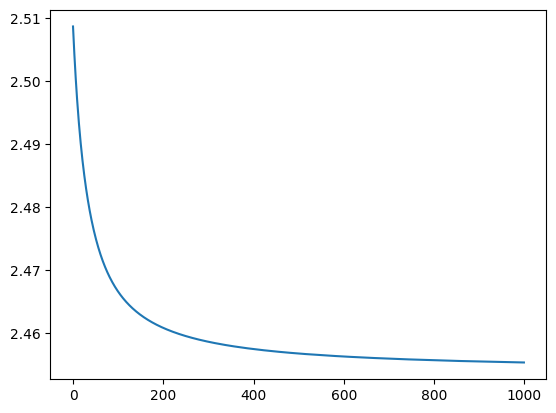

In [37]:
plt.plot(range(len(losses)), losses)

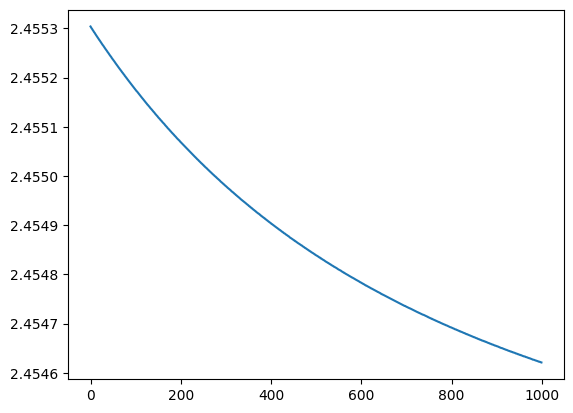

In [39]:
plt.plot(range(len(losses)), losses)

In [57]:
#sample from the neural network
g = torch.Generator().manual_seed(2147483647)

Probs = Counts / Counts.sum(1, keepdim=True)

for _ in range(10):
    x, chars = 0, []
    while True: 
        x = torch.multinomial(Probs[x], num_samples=1, replacement=True, generator=g).item()
        chars.append(itos[x])
        if x == 0:
            break 
    print("".join(chars))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [63]:
( Probs - P ).sum(1).sum().item()

9.892391972243786e-08

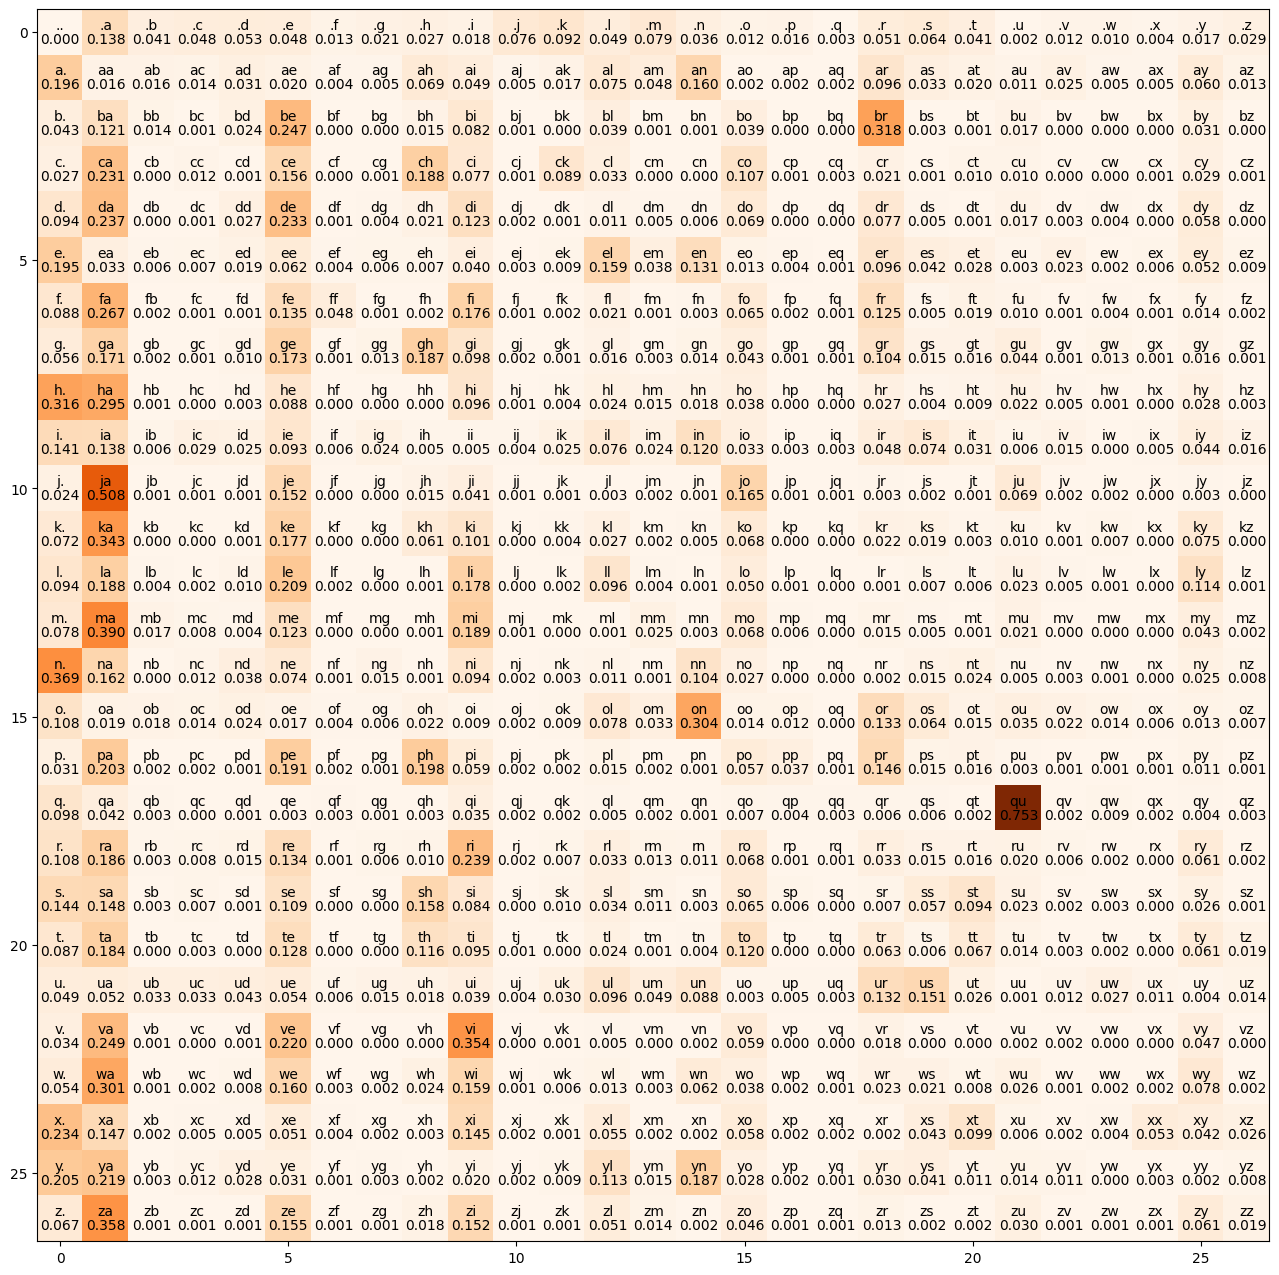

In [67]:
# Draw Probs

plt.figure(figsize=(16, 16))
plt.imshow(Probs.detach().numpy(), cmap="Oranges")
for i in range(len(stoi)):
    for j in range(len(stoi)):
        label = itos[i] + itos[j]
        plt.text(j, i, label, va="bottom", ha="center")
        plt.text(j, i, f"{Probs.detach().numpy()[i, j].item():.3f}", va="top", ha="center") 